In [ ]:
#importing Cleaned data

In [34]:
import pandas as pd

full_data = pd.read_excel('Clean_dataset/cleaned_data.xlsx')
full_data = full_data[full_data['Caller_Company'] =='Zong'] 

In [35]:
from sklearn.preprocessing import LabelEncoder

#full_data["Call_Company"] = pd.factorize(full_data["Call_Company"])[0]
number = LabelEncoder()
full_data['Caller_Company'] = number.fit_transform(full_data['Caller_Company'].astype('str'))

#df1["Caller_Number"] = pd.factorize(full_data["Caller_Number"])[0]
full_data['Caller_Number'] = number.fit_transform(full_data['Caller_Number'].astype('str'))

full_data['Dialled_Company'] = number.fit_transform(full_data['Dialled_Company'].astype('str'))

#full_data["Calltype"] = pd.factorize(full_data["Calltype"])[0]
full_data['Calltype'] = number.fit_transform(full_data['Calltype'].astype('str'))

#full_data["Dialled_Number"] = pd.factorize(full_data["Dialled_Number"])[0]#
full_data['Dialled_Number'] = number.fit_transform(full_data['Dialled_Number'].astype('str'))


In [36]:
from sklearn.model_selection import train_test_split
X= full_data.drop(['Duration','Monetory_Rates'], axis= 1)
X_train,X_test,Y_train,Y_test = train_test_split(X, full_data['Monetory_Rates'],test_size = 0.33, random_state=5)


In [37]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, Y_train)


print X_train.columns
print(clf.coef_)

print(clf.intercept_)


Index([u'Caller_Number', u'Caller_Company', u'Dialled_Number',
       u'Dialled_Company', u'Calltype', u'Month', u'Day', u'Hours'],
      dtype='object')
[ -1.84295309e+00   0.00000000e+00   6.52728761e-03   3.54663065e+01
   3.72182142e+00  -6.02329296e+00   2.75197588e-01   2.36461456e+00]
157.778341212


In [38]:
pred_train = clf.predict(X_train)

In [39]:
clf.score(X_train,Y_train)

0.0077529533291385011

In [40]:
pred_test = clf.predict(X_test)

In [41]:
clf.score(X_test,Y_test)

0.0083258758234119323

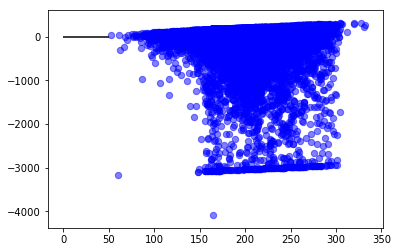

In [42]:
import matplotlib.pyplot as plt
plt.scatter(clf.predict(X_train),clf.predict(X_train)-Y_train,c='b',s=40, alpha=0.5)
plt.scatter(clf.predict(X_test),clf.predict(X_test)-Y_test,c='b',s=40, alpha=0.5)
plt.hlines(y=0,xmin=0, xmax= 50)
plt.show()

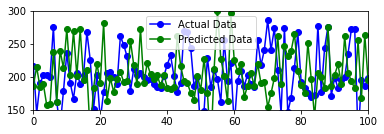

In [43]:
import matplotlib.pyplot as plt

fig= plt.figure()

#fig.subplots_adjust(bottom=0.2)

ax1 = fig.add_subplot(211)

line1=ax1.plot(pred_train,'bo-',label='Actual Data')
line2=ax1.plot(pred_test,'go-',label='Predicted Data')

ax1.set_ylim(150,300)
ax1.set_xlim(0,100)

plt.legend()
plt.show()